In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations as C

In [5]:
df = pd.read_excel('sample_data/df_flats.xlsx')

In [6]:
df

,price,floor,totalArea,roomsCount,hasInternet,hasTv,timeMetro,floorsHouse
0,37000,6,33.000000,1,0,0,15,9
1,37000,9,34.099998,1,1,1,22,12
2,33000,2,27.000000,1,0,0,9,5
3,72000,1,69.000000,3,1,0,10,25
4,50000,3,54.000000,2,1,1,16,16
...,...,...,...,...,...,...,...,...
995,800000,28,500.000000,6,1,1,8,30
996,320000,3,195.000000,5,1,1,5,4
997,600000,3,154.000000,4,1,1,6,15
998,130000,4,54.000000,2,1,1,8,15


Text(0.5, 1.0, 'Гистограмма цен за аренду квартиры')

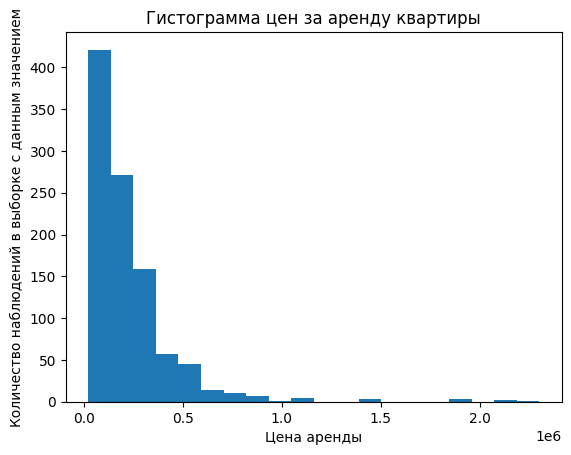

In [7]:
plt.hist(df['price'], bins = 20)
plt.xlabel('Цена аренды')
plt.ylabel('Количество наблюдений в выборке с данным значением')
plt.title('Гистограмма цен за аренду квартиры')

Text(0.5, 1.0, 'Гистограмма цен за аренду квартиры в логарифмах')

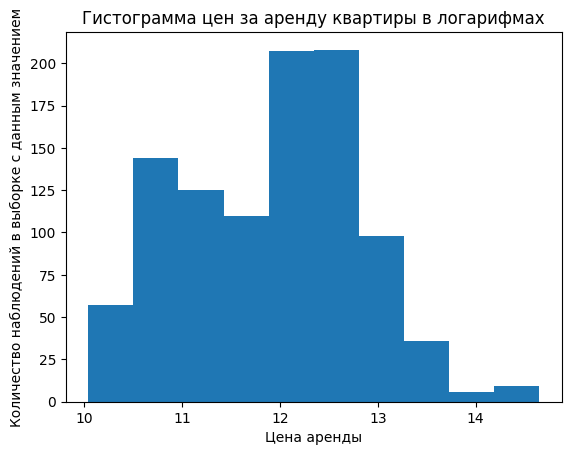

In [8]:
plt.hist(np.log(df['price']), bins = 10)
plt.xlabel('Цена аренды')
plt.ylabel('Количество наблюдений в выборке с данным значением')
plt.title('Гистограмма цен за аренду квартиры в логарифмах')

Text(0.5, 1.0, 'Ящик с усами цен')

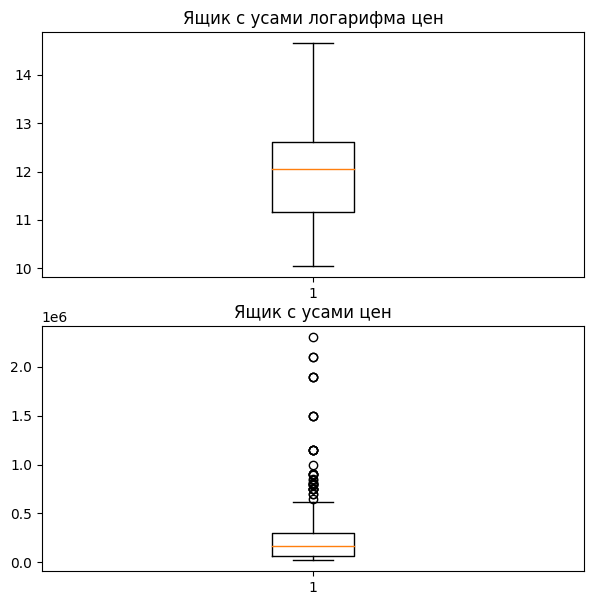

In [9]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
plt.boxplot(np.log(df['price']))
plt.title('Ящик с усами логарифма цен')

plt.subplot(2, 1, 2)
plt.boxplot(df['price'])
plt.title('Ящик с усами цен')

In [13]:
combs = list(C(df.columns[1:], 2))
corr_d= pd.DataFrame(columns=['переменная 1', 'переменная 2', 'corr', 'P-value нулевой гипотезы', 'Принмается ли'])
for i in range(len(combs)):
  corr_d.loc[len(corr_d)]=[combs[i][0], combs[i][1],sts.pearsonr(df[combs[i][0]], df[combs[i][1]])[0] , sts.pearsonr(df[combs[i][0]], df[combs[i][1]])[1], sts.pearsonr(df[combs[i][0]], df[combs[i][1]])[1] > 0.1]

corr_d

,переменная 1,переменная 2,corr,P-value нулевой гипотезы,Принмается ли
0,floor,totalArea,0.020657,5.140959e-01,True
1,floor,roomsCount,-0.035086,2.676613e-01,True
2,floor,hasInternet,0.029257,3.553687e-01,True
3,floor,hasTv,-0.018898,5.505604e-01,True
4,floor,timeMetro,0.010834,7.322036e-01,True
5,floor,floorsHouse,0.782086,3.357812e-207,False
6,totalArea,roomsCount,0.857663,1.546029e-290,False
7,totalArea,hasInternet,0.212201,1.207266e-11,False
8,totalArea,hasTv,0.358895,9.158265e-32,False
9,totalArea,timeMetro,-0.251455,6.927574e-16,False


In [14]:
corr_d.to_excel('corr.xlsx')


Text(0, 0.5, 'Стоимость')

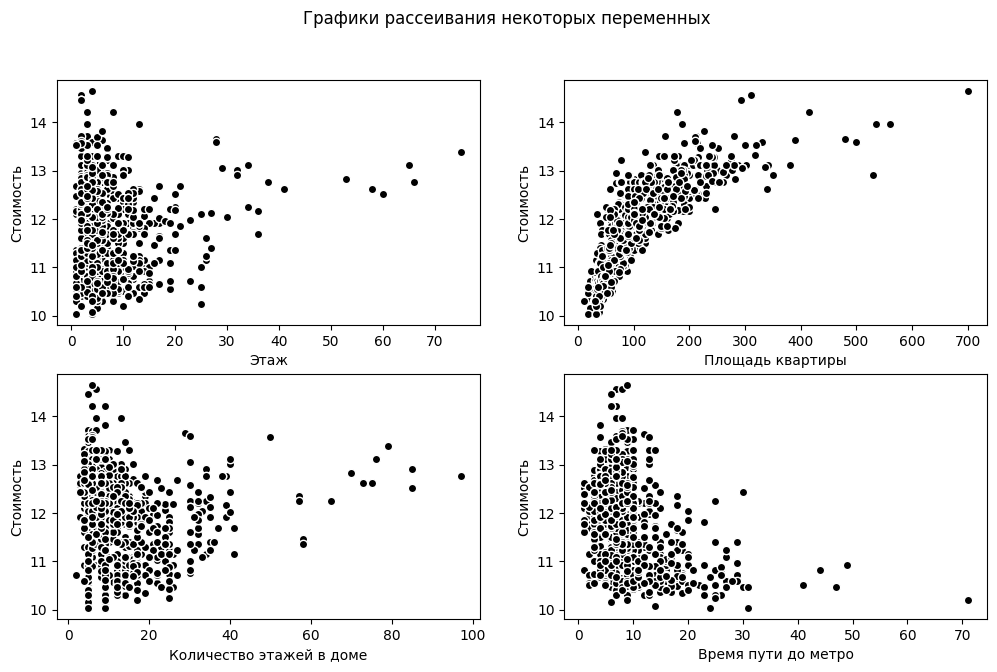

In [11]:
plt.figure(figsize=(12, 7))
plt.suptitle('Графики рассеивания некоторых переменных')

plt.subplot(2, 2, 1)
plt.scatter(df['floor'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 2)
plt.scatter(df['totalArea'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 3)
plt.scatter(df['floorsHouse'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 4)
plt.scatter(df['timeMetro'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Время пути до метро')
plt.ylabel('Стоимость')

Text(0, 0.5, 'Стоимость')

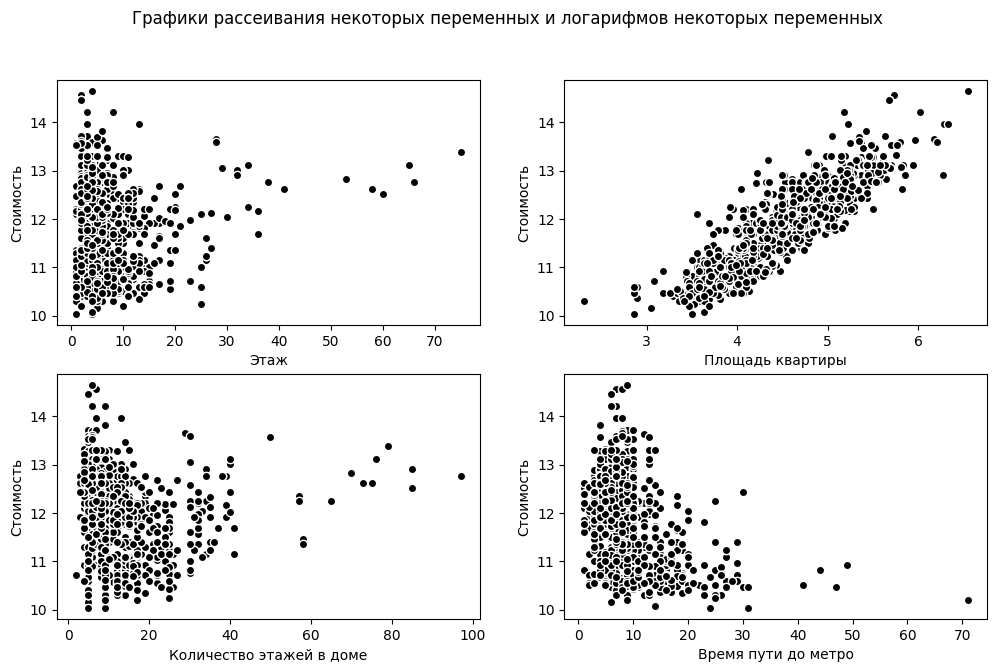

In [12]:
plt.figure(figsize=(12, 7))
plt.suptitle('Графики рассеивания некоторых переменных и логарифмов некоторых переменных')

plt.subplot(2, 2, 1)
plt.scatter(df['floor'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 2)
plt.scatter(np.log(df['totalArea']), np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 3)
plt.scatter(df['floorsHouse'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Стоимость')

plt.subplot(2, 2, 4)
plt.scatter(df['timeMetro'], np.log(df['price']), color='k', edgecolors='w')
plt.xlabel('Время пути до метро')
plt.ylabel('Стоимость')